In [42]:
pip install folium seaborn

In [47]:
import pandas as pd
import requests
import time
import json
from pathlib import Path
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from google.colab import files

uploaded = files.upload()

Saving ONDO_crosschecked.csv to ONDO_crosschecked (1).csv


In [28]:
df = pd.read_csv('ONDO_crosschecked.csv')

In [29]:
df

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,ONDO,AKOKO NORTH EAST,EDO,28-01-01-001,"ODE ELESHO/ODE OKELOKO, IN FRONT OF CH. ALAKEL...",253,808,True,-1,False,True,False,False,UNKNOWN,220,1,27,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
1,ONDO,AKOKO NORTH EAST,EDO,28-01-01-002,"ODEKE/AISA/ODE ASSI ALU, IN FRONT OF CHIEF ASS...",185,514,True,-1,False,False,False,False,UNKNOWN,157,0,21,0,https://docs.inecelectionresults.net/elections...
2,ONDO,AKOKO NORTH EAST,EDO,28-01-01-003,ODEKE/AISA/ODE ASSI ALU OPEN SPACE NEAR CHIE...,142,319,True,-1,False,False,False,False,UNKNOWN,109,0,28,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,ONDO,AKOKO NORTH EAST,EDO,28-01-01-004,ODE KOLOFIN/ODEAGBARI IN FRONT OF CHIEF OLORU...,178,479,True,-1,False,False,False,False,UNKNOWN,163,1,12,0,https://docs.inecelectionresults.net/elections...
4,ONDO,AKOKO NORTH EAST,EDO,28-01-01-007,ODEKE AISA/ODE ASSI ALU OPP. ONIGBEDES HOUSE,254,621,True,-1,False,True,False,False,UNKNOWN,218,1,31,0,https://docs.inecelectionresults.net/elections...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,ONDO,ODIGBO,ORE 1,28-13-10-049,"OPEN SPACE ADJACENT DOLLAR HOTEL, EBENEZER STR...",28,43,True,-1,False,False,False,False,UNKNOWN,11,6,8,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2682,ONDO,ODIGBO,ORE 1,28-13-10-062,"OPEN SPACE AT MUBARAK JUNCTION, OGBE I, ORE",50,272,True,-1,False,True,False,False,UNKNOWN,31,5,9,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2683,ONDO,ODIGBO,ORE 1,28-13-10-074,OPEN SPACE AT THE BACK OF CAROSOJI PETROL STAT...,46,62,True,-1,False,False,False,False,UNKNOWN,36,3,1,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2684,ONDO,ODIGBO,ORE 1,28-13-10-076,"OPEN SPACE IN FRONT OF AREA MOTHER, ORE",150,601,True,-1,False,False,False,False,UNKNOWN,58,54,11,3,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


Since the dataset lacks latitude and longitude coordinates, we'll need to obtain them using geocoding techniques.

In [30]:
API_KEY = 'b8ab43fe13874c46b0fcf3c1b644f791'

In [31]:
# Cache file path
cache_file = Path('geocode_cache.json')

In [32]:
# Load cache if exists
if cache_file.exists():
    with open(cache_file, 'r') as file:
        geocode_cache = json.load(file)
else:
    geocode_cache = {}

In [33]:
# Geocoding function with caching
def geocode(address):
    if address in geocode_cache:
        return geocode_cache[address]
    try:
        response = requests.get(f"https://api.opencagedata.com/geocode/v1/json?q={address}&key={API_KEY}")
        data = response.json()
        if data['results']:
            lat, lon = data['results'][0]['geometry']['lat'], data['results'][0]['geometry']['lng']
            geocode_cache[address] = (lat, lon)
            return lat, lon
        else:
            geocode_cache[address] = (None, None)
            return None, None
    except Exception as e:
        print(f"Error geocoding address {address}: {e}")
        geocode_cache[address] = (None, None)
        return None, None

In [34]:
# Apply geocoding if latitude and longitude columns are not present
if 'latitude' not in df.columns or 'longitude' not in df.columns:
    df['latitude'], df['longitude'] = zip(*df['PU-Name'].apply(geocode))

In [35]:
# Handle rows where geocoding failed
df = df.dropna(subset=['latitude', 'longitude'])

# Save the updated dataset with latitude and longitude
df.to_csv('ONDO_crosschecked_geocoded.csv', index=False)

# Save the cache
with open(cache_file, 'w') as file:
    json.dump(geocode_cache, file)

print("Geocoding complete and dataset saved.")

Geocoding complete and dataset saved.


In [36]:
df

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,latitude,longitude
0,ONDO,AKOKO NORTH EAST,EDO,28-01-01-001,"ODE ELESHO/ODE OKELOKO, IN FRONT OF CH. ALAKEL...",253,808,True,-1,False,...,False,False,UNKNOWN,220,1,27,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,34.64673,-103.90441
1,ONDO,AKOKO NORTH EAST,EDO,28-01-01-002,"ODEKE/AISA/ODE ASSI ALU, IN FRONT OF CHIEF ASS...",185,514,True,-1,False,...,False,False,UNKNOWN,157,0,21,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441
3,ONDO,AKOKO NORTH EAST,EDO,28-01-01-004,ODE KOLOFIN/ODEAGBARI IN FRONT OF CHIEF OLORU...,178,479,True,-1,False,...,False,False,UNKNOWN,163,1,12,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441
4,ONDO,AKOKO NORTH EAST,EDO,28-01-01-007,ODEKE AISA/ODE ASSI ALU OPP. ONIGBEDES HOUSE,254,621,True,-1,False,...,False,False,UNKNOWN,218,1,31,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441
5,ONDO,AKOKO NORTH EAST,EDO,28-01-01-008,"ODELUKE, IN FRONT OF LATE CHIEF ODELUKES HOUSE",201,429,True,-1,False,...,False,False,UNKNOWN,169,0,21,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,ONDO,ONDO WEST,OKELISA OKEDOKO/OGBODU,28-16-11-006,"OUR SAVIOUR PRY SCH, AYOADE II",146,462,True,-1,False,...,False,False,UNKNOWN,88,25,0,0,https://docs.inecelectionresults.net/elections...,65.31735,25.37310
2124,ONDO,ONDO WEST,OKELISA OKEDOKO/OGBODU,28-16-11-014,OPEN SPACE AT ILEMOBORO/MOTILAYO JUNCTION I,184,783,True,-1,False,...,False,False,UNKNOWN,100,25,44,3,https://docs.inecelectionresults.net/elections...,18.16667,-7.08333
2125,ONDO,ONDO WEST,OKELISA OKEDOKO/OGBODU,28-16-11-015,OPEN SPACE AT ILEMOBORO/MOTILAYO JUNCTION II,161,758,True,-1,False,...,False,False,UNKNOWN,104,17,33,0,https://docs.inecelectionresults.net/elections...,65.31735,25.37310
2552,ONDO,AKURE SOUTH,OSHODI/ISOLO,28-06-10-050,OPEN SPACE BESIDE 87 AJELORO STRRET ISOLO,5,8,True,-1,False,...,False,False,UNKNOWN,0,0,3,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,45.31337,11.16525


## Identify Neighboring Polling Units

In [37]:
import geopy.distance

# Function to find neighboring polling units within a given radius
def find_neighbors(df, radius=1):
    neighbors = []
    for i, row in df.iterrows():
        lat, lon = row['latitude'], row['longitude']
        distances = df.apply(lambda r: geopy.distance.geodesic((lat, lon), (r['latitude'], r['longitude'])).km, axis=1)
        neighbors.append(df[distances <= radius].index.tolist())
    return neighbors

# Find neighbors for each polling unit
df['neighbors'] = find_neighbors(df)

<ipython-input-37-9b3106e9d665>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbors'] = find_neighbors(df)


## Calculate Outlier Scores

In [40]:
# Calculate outlier scores
def calculate_outlier_scores(df):
    party_columns = ['APC', 'LP', 'PDP', 'NNPP']
    outlier_scores = {party: [] for party in party_columns}
    for i, row in df.iterrows():
        neighbors = df.loc[row['neighbors']]
        for party in party_columns:
            outlier_score = abs(row[party] - neighbors[party].mean())
            outlier_scores[party].append(outlier_score)
    for party in party_columns:
        df[f'{party}_outlier_score'] = outlier_scores[party]

calculate_outlier_scores(df)

<ipython-input-40-65150fd4e18e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{party}_outlier_score'] = outlier_scores[party]
<ipython-input-40-65150fd4e18e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{party}_outlier_score'] = outlier_scores[party]
<ipython-input-40-65150fd4e18e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [41]:
# Save the dataset with outlier scores
df.to_csv('ONDO_outlier_scores.csv', index=False)

## Sort and Report

In [44]:
# Sort the dataset by outlier scores
sorted_df = df.sort_values(by='outlier_scores', ascending=False)

# Save the sorted dataset to an Excel file
sorted_df.to_excel('sorted_outlier_scores.xlsx', index=False)

# Generate a report
report = "Outlier Detection Report:\n"

top_outliers = sorted_df.head(3)
for i, row in top_outliers.iterrows():
    report += f"\nPolling Unit: {row['PU-Name']}\nOutlier Score: {row['outlier_scores']}\n"

# Save the report to a text file
with open('outlier_detection_report.txt', 'w') as file:
    file.write(report)

print("Analysis complete. Cleaned dataset, sorted outlier scores, and report generated.")

Analysis complete. Cleaned dataset, sorted outlier scores, and report generated.


In [45]:

# Create a base map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
election_map = folium.Map(location=map_center, zoom_start=10)

# Add polling units to the map
for i, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        popup=(
            f"PU Name: {row['PU-Name']}<br>"
            f"APC: {row['APC']}<br>LP: {row['LP']}<br>"
            f"PDP: {row['PDP']}<br>NNPP: {row['NNPP']}<br>"
            f"APC Outlier Score: {row['APC_outlier_score']}<br>"
            f"LP Outlier Score: {row['LP_outlier_score']}<br>"
            f"PDP Outlier Score: {row['PDP_outlier_score']}<br>"
            f"NNPP Outlier Score: {row['NNPP_outlier_score']}"
        ),
        color='blue' if row['APC_outlier_score'] > row[['LP_outlier_score', 'PDP_outlier_score', 'NNPP_outlier_score']].max() else
              'red' if row['LP_outlier_score'] > row[['APC_outlier_score', 'PDP_outlier_score', 'NNPP_outlier_score']].max() else
              'green' if row['PDP_outlier_score'] > row[['APC_outlier_score', 'LP_outlier_score', 'NNPP_outlier_score']].max() else
              'purple',
        fill=True,
        fill_opacity=0.6
    ).add_to(election_map)

# Save the map to an HTML file
election_map.save('election_map.html')

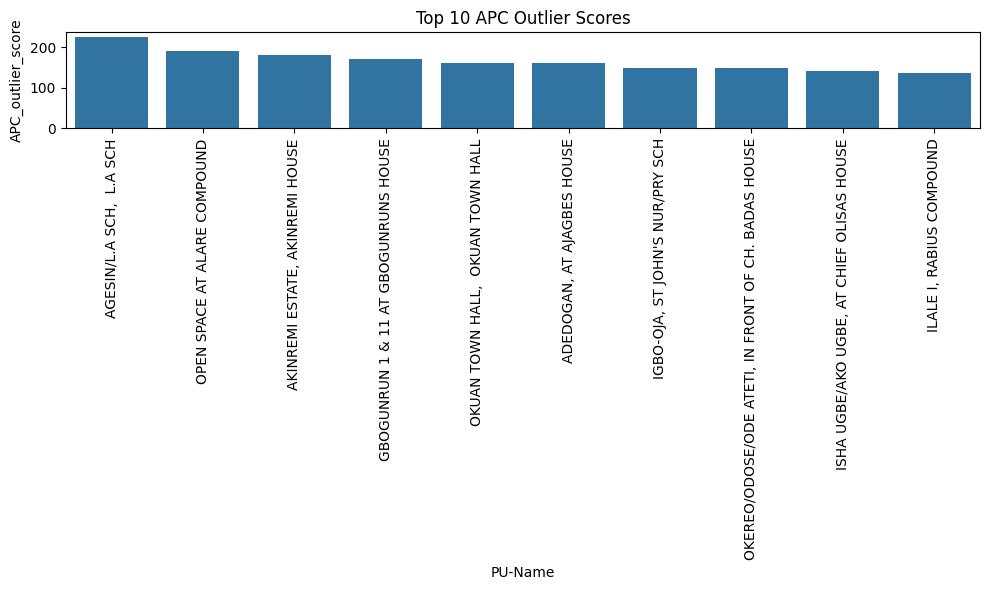

In [48]:
# Create bar plots for outlier scores
plt.figure(figsize=(10, 6))
sns.barplot(x='PU-Name', y='APC_outlier_score', data=df.sort_values('APC_outlier_score', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 APC Outlier Scores')
plt.tight_layout()
plt.savefig('APC_outlier_scores.png')

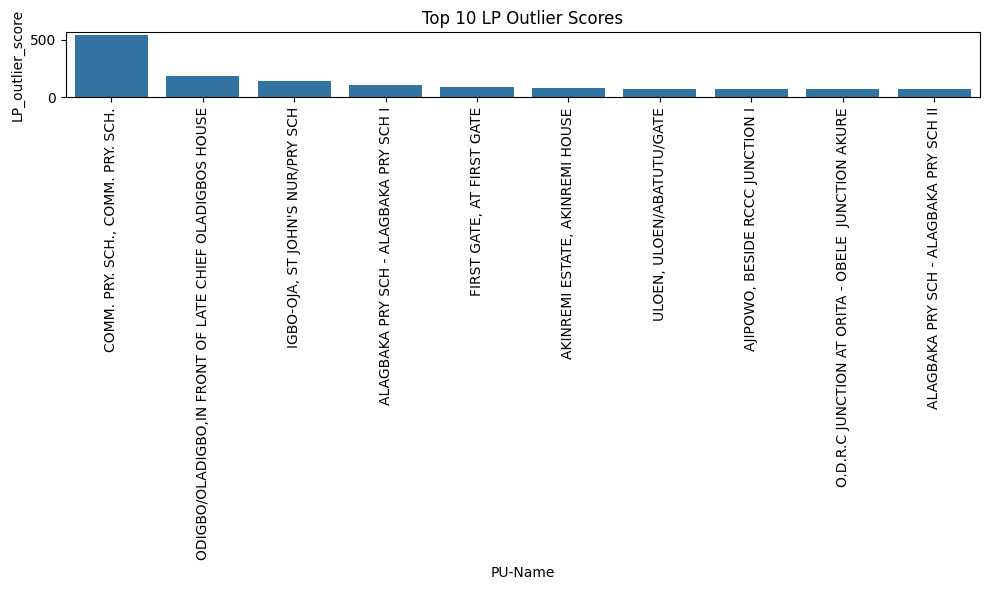

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PU-Name', y='LP_outlier_score', data=df.sort_values('LP_outlier_score', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 LP Outlier Scores')
plt.tight_layout()
plt.savefig('LP_outlier_scores.png')

<ipython-input-50-9690fe76de14>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


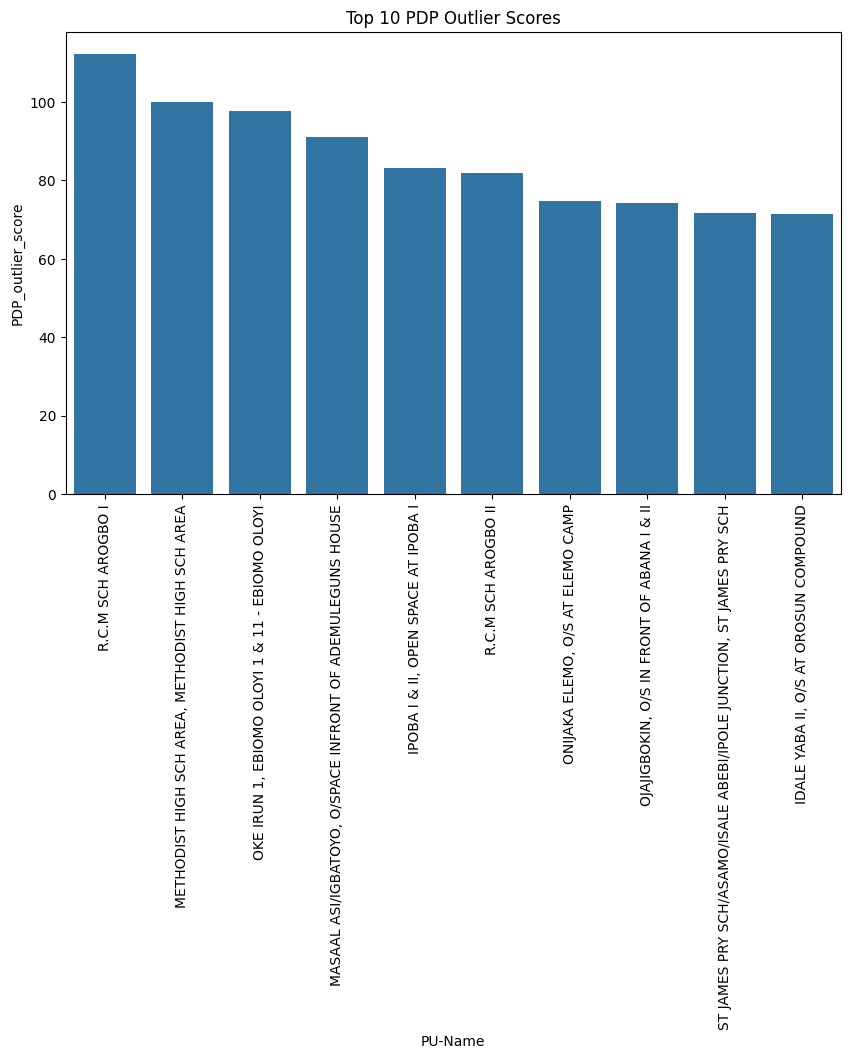

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PU-Name', y='PDP_outlier_score', data=df.sort_values('PDP_outlier_score', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 PDP Outlier Scores')
plt.tight_layout()
plt.savefig('PDP_outlier_scores.png')

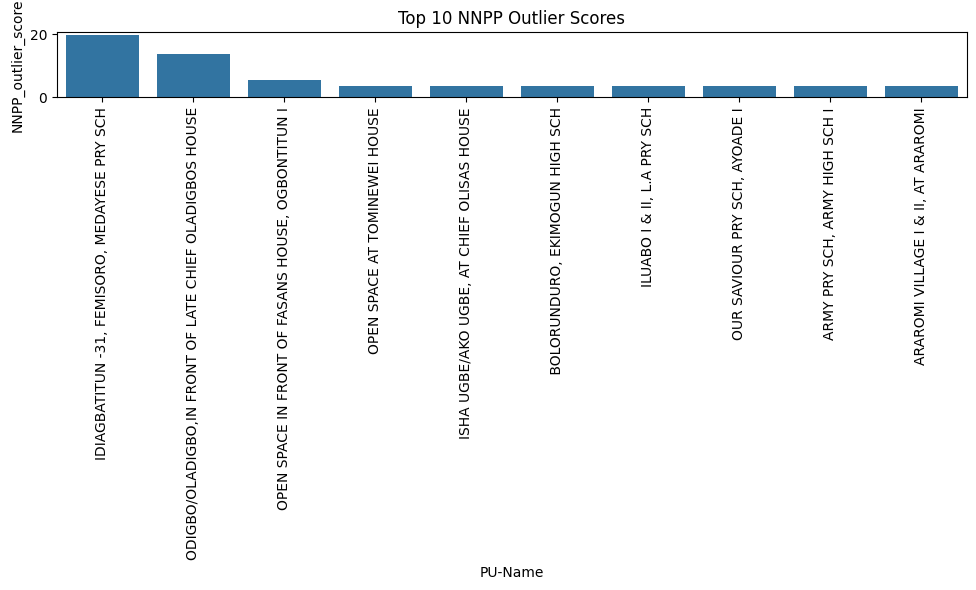

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PU-Name', y='NNPP_outlier_score', data=df.sort_values('NNPP_outlier_score', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 NNPP Outlier Scores')
plt.tight_layout()
plt.savefig('NNPP_outlier_scores.png')

In [52]:
print("Visualization complete. Map and charts saved.")

Visualization complete. Map and charts saved.


In [53]:
df.to_csv('ONDO_crosschecked_updated.csv', index=False)

In [55]:
df

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,NNPP,Results_File,latitude,longitude,neighbors,outlier_scores,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score
0,ONDO,AKOKO NORTH EAST,EDO,28-01-01-001,"ODE ELESHO/ODE OKELOKO, IN FRONT OF CH. ALAKEL...",253,808,True,-1,False,...,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,34.64673,-103.90441,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24, 25...",113.645161,99.967742,12.193548,0.798387,0.685484
1,ONDO,AKOKO NORTH EAST,EDO,28-01-01-002,"ODEKE/AISA/ODE ASSI ALU, IN FRONT OF CHIEF ASS...",185,514,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24, 25...",57.274194,36.967742,13.193548,6.798387,0.314516
3,ONDO,AKOKO NORTH EAST,EDO,28-01-01-004,ODE KOLOFIN/ODEAGBARI IN FRONT OF CHIEF OLORU...,178,479,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24, 25...",71.274194,42.967742,12.193548,15.798387,0.314516
4,ONDO,AKOKO NORTH EAST,EDO,28-01-01-007,ODEKE AISA/ODE ASSI ALU OPP. ONIGBEDES HOUSE,254,621,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24, 25...",113.677419,97.967742,12.193548,3.201613,0.314516
5,ONDO,AKOKO NORTH EAST,EDO,28-01-01-008,"ODELUKE, IN FRONT OF LATE CHIEF ODELUKES HOUSE",201,429,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,34.64673,-103.90441,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24, 25...",69.274194,48.967742,13.193548,6.798387,0.314516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,ONDO,ONDO WEST,OKELISA OKEDOKO/OGBODU,28-16-11-006,"OUR SAVIOUR PRY SCH, AYOADE II",146,462,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,65.31735,25.37310,"[63, 441, 498, 508, 550, 553, 559, 566, 570, 5...",42.978723,7.436170,6.074468,29.180851,0.287234
2124,ONDO,ONDO WEST,OKELISA OKEDOKO/OGBODU,28-16-11-014,OPEN SPACE AT ILEMOBORO/MOTILAYO JUNCTION I,184,783,True,-1,False,...,3,https://docs.inecelectionresults.net/elections...,18.16667,-7.08333,"[38, 443, 453, 454, 456, 483, 488, 502, 503, 5...",5.321429,0.133929,1.455357,1.187500,2.544643
2125,ONDO,ONDO WEST,OKELISA OKEDOKO/OGBODU,28-16-11-015,OPEN SPACE AT ILEMOBORO/MOTILAYO JUNCTION II,161,758,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,65.31735,25.37310,"[63, 441, 498, 508, 550, 553, 559, 566, 570, 5...",29.468085,23.436170,1.925532,3.819149,0.287234
2552,ONDO,AKURE SOUTH,OSHODI/ISOLO,28-06-10-050,OPEN SPACE BESIDE 87 AJELORO STRRET ISOLO,5,8,True,-1,False,...,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,45.31337,11.16525,[2552],0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
# Download the file
files.download('ONDO_crosschecked_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>